In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/data.csv")
data.head()

,Unnamed: 0,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,0,3.688879,State-gov,11.258253,Bachelors,1.135322,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,-0.035080,United-States,<=50K
1,1,3.931826,Self-emp-not-inc,11.330348,Bachelors,1.135322,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.227904,United-States,<=50K
2,2,3.663562,Private,12.281398,HS-grad,-0.419772,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035080,United-States,<=50K
3,3,3.988984,Private,12.366157,11th,-1.197318,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035080,United-States,<=50K
4,4,3.367296,Private,12.732013,Bachelors,1.135322,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035080,Cuba,<=50K


In [3]:
final_df_training = pd.read_csv("./data/final_df_training.csv")
final_df_training.head()

,Unnamed: 0,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,...,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Income
0,0,3.688879,11.258253,7.684784,0.0,1.135322,-0.035080,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
1,1,3.931826,11.330348,0.000000,0.0,1.135322,-2.227904,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
2,2,3.663562,12.281398,0.000000,0.0,-0.419772,-0.035080,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
3,3,3.988984,12.366157,0.000000,0.0,-1.197318,-0.035080,0,0,0,...,0,0,0,0,1,0,0,0,1,-1.0
4,4,3.367296,12.732013,0.000000,0.0,1.135322,-0.035080,0,0,0,...,0,1,0,0,1,0,0,1,0,-1.0


In [6]:
final_df_prediction = pd.read_csv("./data/final_df_prediction.csv")
final_df_prediction.head()

,Unnamed: 0,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,...,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Income
0,5000,3.871201,11.285121,10.233834,0.000000,1.912869,0.777077,0,0,0,...,0,0,0,0,0,0,1,0,1,NaN
1,5001,4.025352,11.928176,0.000000,7.372118,1.135322,-0.197511,0,0,0,...,0,0,0,0,0,0,1,1,0,NaN
2,5002,3.295837,11.795560,8.519989,0.000000,-0.419772,-0.035080,0,0,0,...,0,1,0,0,0,0,1,1,0,NaN
3,5003,3.367296,11.993343,0.000000,0.000000,-0.419772,-0.035080,0,0,0,...,1,0,0,0,0,0,1,1,0,NaN
4,5004,3.610918,11.040471,0.000000,0.000000,-0.419772,-0.035080,0,0,0,...,0,0,0,0,1,0,0,0,1,NaN


In [7]:
print(len(data))
print(len(final_df_training))
print(len(final_df_prediction))

30000
5000
25000


In [107]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

def evaulation(test_y:np.ndarray,pred_y:np.ndarray):
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

    print(f"Accuracy Score : {np.round(accuracy_score(test_y,pred_y)*100,2)}%")
    print(f"Recall Score : {np.round(recall_score(test_y,pred_y)*100,2)}%")
    print(f"Precision Score : {np.round(precision_score(test_y,pred_y)*100,2)}%")
    print(f"F1 Score : {np.round(f1_score(test_y,pred_y)*100,2)}%")

    print("\n")

    cm = confusion_matrix(test_y, pred_y)

    print(f"Confusion Matrix : \n{cm}")

    # return accuracy_score(test_y,pred_y)

In [56]:
X = final_df_training.drop(columns=['Unnamed: 0','Income'],axis=1)
y = final_df_training["Income"]

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101,shuffle=True)
X_pred = final_df_prediction.drop(columns=['Unnamed: 0','Income'],axis=1)

In [65]:
X_train[0:5]

,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,Employment_Type_ Private,...,Partnership_ Own-child,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male
3413,3.555348,12.739465,8.895493,0.0,1.135322,1.589234,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1610,4.077537,12.262207,0.000000,0.0,-0.808545,0.939509,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3459,3.091042,12.784855,0.000000,0.0,-0.419772,-0.035080,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4293,3.526361,12.238119,0.000000,0.0,-0.030998,-0.035080,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1039,3.555348,12.009510,0.000000,0.0,-1.197318,-2.633982,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [67]:
LR.fit(X_train,y_train)

c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = LR.predict(X_test)
evaulation(y_test,y_pred)

Accuracy Score : 84.4%
Recall Score : 55.51%
Precision Score : 74.32%
F1 Score : 63.55%


Confusion Matrix : 
[[708  47]
 [109 136]]


In [69]:
y_pred_wo_income = LR.predict(X_pred)

Income
 <=50K    20075
 >50K      4925
dtype: int64


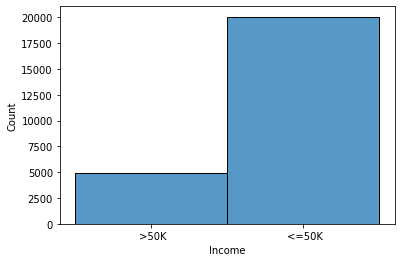

In [70]:
print(pd.DataFrame(y_pred_wo_income,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning the LR model

In [94]:
LR2 = LogisticRegression(penalty="l2",solver="lbfgs",max_iter=500)
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
evaulation(y_test,y_pred_LR2)

Accuracy Score : 84.1%
Recall Score : 54.69%
Precision Score : 73.63%
F1 Score : 62.76%


Confusion Matrix : 
[[707  48]
 [111 134]]


In [95]:
LR2 = LogisticRegression(penalty="l2",solver="liblinear",max_iter=500)
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
evaulation(y_test,y_pred_LR2)

Accuracy Score : 84.1%
Recall Score : 55.51%
Precision Score : 73.12%
F1 Score : 63.11%


Confusion Matrix : 
[[705  50]
 [109 136]]


In [96]:
LR2 = LogisticRegression(penalty="l2",solver="saga",max_iter=500)
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
evaulation(y_test,y_pred_LR2)

Accuracy Score : 84.4%
Recall Score : 55.1%
Precision Score : 74.59%
F1 Score : 63.38%


Confusion Matrix : 
[[709  46]
 [110 135]]


c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [97]:
LR2 = LogisticRegression(penalty="l2",solver="newton-cg",max_iter=500)
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
evaulation(y_test,y_pred_LR2)

Accuracy Score : 84.1%
Recall Score : 54.69%
Precision Score : 73.63%
F1 Score : 62.76%


Confusion Matrix : 
[[707  48]
 [111 134]]


# Decision Trees


In [71]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [72]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred_DT = DT.predict(X_test)
evaulation(y_test,y_pred_DT)

Accuracy Score : 79.3%
Recall Score : 55.51%
Precision Score : 58.12%
F1 Score : 56.78%


Confusion Matrix : 
[[657  98]
 [109 136]]


In [152]:
y_pred_wo_income_DT = DT.predict(X_pred)

Income
 <=50K    18906
 >50K      6094
dtype: int64


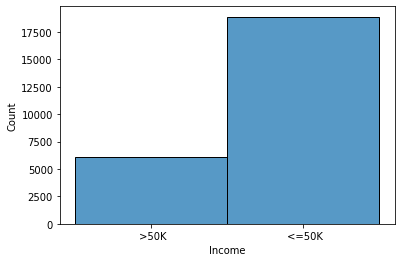

In [153]:
print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning the DT model

In [113]:
acc_list = []
for i in np.arange(1,101,1):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    # evaulation(y_test,model.predict(X_test))
    acc_list.append(accuracy_score(y_test,model.predict(X_test)))

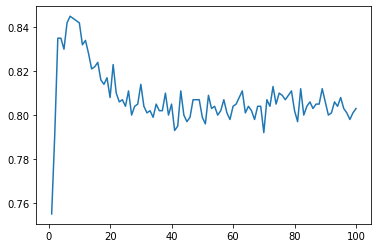

In [114]:
plt.plot(np.arange(1,101,1),acc_list)

In [115]:
np.arange(1,101,1)[np.argmax(acc_list)]

7

In [138]:
min_split_list = []
for i in np.arange(1,10,1):
    model = DecisionTreeClassifier(max_depth=7,min_samples_split=2,min_samples_leaf=i)
    model.fit(X_train,y_train)
    min_split_list.append(accuracy_score(y_test,model.predict(X_test)))

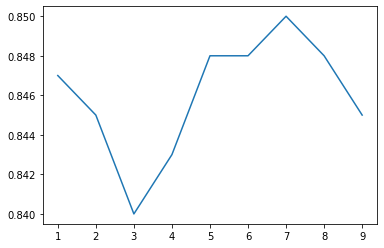

In [139]:
plt.plot(np.arange(1,10,1),min_split_list)

In [144]:
max_features_list = []
for i in ["auto","sqrt","log2",None]:
    model = DecisionTreeClassifier(max_depth=7,min_samples_split=2,min_samples_leaf=7,max_features=i)
    model.fit(X_train,y_train)
    max_features_list.append(accuracy_score(y_test,model.predict(X_test)))

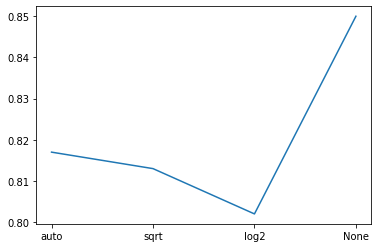

In [145]:
plt.plot(["auto","sqrt","log2","None"],max_features_list)

In [147]:
criterion_list = []
for i in ['gini', 'entropy']:
    model = DecisionTreeClassifier(max_depth=7,min_samples_split=2,min_samples_leaf=7,max_features=None,criterion=i)
    model.fit(X_train,y_train)
    criterion_list.append(accuracy_score(y_test,model.predict(X_test)))

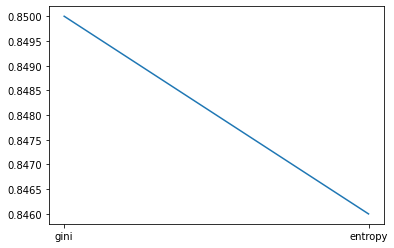

In [148]:
plt.plot(['gini','entropy'],criterion_list)

In [149]:
tuned_model = DecisionTreeClassifier(max_depth=7,min_samples_split=2,min_samples_leaf=2,max_features=None,criterion='gini')
tuned_model.fit(X_train,y_train)
evaulation(y_test,tuned_model.predict(X_test))

Accuracy Score : 84.6%
Recall Score : 53.06%
Precision Score : 76.92%
F1 Score : 62.8%


Confusion Matrix : 
[[716  39]
 [115 130]]


In [154]:
y_pred_wo_income_DT2 = tuned_model.predict(X_pred)

Income
 <=50K    18906
 >50K      6094
dtype: int64


Income
 <=50K    20712
 >50K      4288
dtype: int64


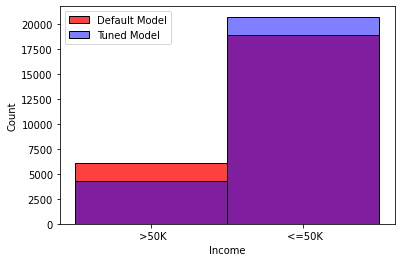

In [158]:
print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

In [77]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred_RF = RF.predict(X_test)
evaulation(y_test,y_pred_RF)

Accuracy Score : 84.0%
Recall Score : 58.78%
Precision Score : 70.94%
F1 Score : 64.29%


Confusion Matrix : 
[[696  59]
 [101 144]]


In [79]:
y_pred_wo_income_RF = RF.predict(X_pred)

Income
 <=50K    19898
 >50K      5102
dtype: int64


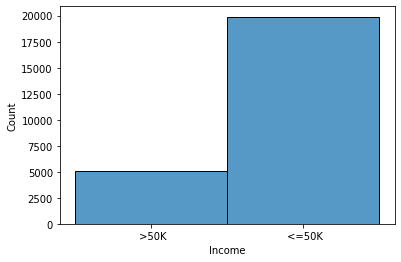

In [80]:
print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

# SVM

In [81]:
from sklearn.svm import SVC

clf_SVM = SVC()

In [82]:
clf_SVM.fit(X_train,y_train)

SVC()

In [83]:
y_pred_SVM = clf_SVM.predict(X_test)
evaulation(y_test,y_pred_SVM)

Accuracy Score : 83.5%
Recall Score : 48.57%
Precision Score : 75.32%
F1 Score : 59.06%


Confusion Matrix : 
[[716  39]
 [126 119]]


In [84]:
y_pred_wo_income_RF = RF.predict(X_pred)

Income
 <=50K    19898
 >50K      5102
dtype: int64


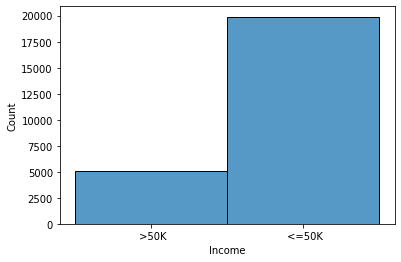

In [85]:
print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

In [ ]:
X_train

,Unnamed: 0,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,...,Partnership_ Own-child,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male
3413,3413,3.555348,12.739465,8.895493,0.0,1.135322,1.589234,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1610,1610,4.077537,12.262207,0.000000,0.0,-0.808545,0.939509,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3459,3459,3.091042,12.784855,0.000000,0.0,-0.419772,-0.035080,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4293,4293,3.526361,12.238119,0.000000,0.0,-0.030998,-0.035080,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1039,1039,3.555348,12.009510,0.000000,0.0,-1.197318,-2.633982,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,4171,3.931826,12.038736,0.000000,0.0,-0.419772,0.695862,0,1,0,...,0,1,0,0,0,0,0,1,1,0
599,599,3.912023,11.823757,0.000000,0.0,1.135322,0.370999,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1361,1361,3.970292,11.893954,0.000000,0.0,-0.419772,-0.035080,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1547,1547,3.663562,12.102616,0.000000,0.0,1.135322,-0.035080,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# k-Nearest Neighbors (KNN)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

k = 2  # Specify the number of neighbors
clf_KNN = KNeighborsClassifier(n_neighbors=k)

In [87]:
clf_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [88]:
y_pred_KNN = clf_KNN.predict(X_test)
evaulation(y_test,y_pred_KNN)

Accuracy Score : 80.4%
Recall Score : 39.59%
Precision Score : 66.9%
F1 Score : 49.74%


Confusion Matrix : 
[[707  48]
 [148  97]]


In [89]:
y_pred_wo_income_KNN = clf_KNN.predict(X_pred)

Income
 <=50K    21153
 >50K      3847
dtype: int64


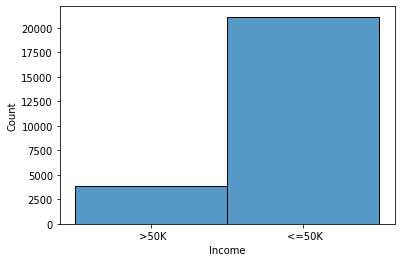

In [90]:
print(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

# Neural Networks